<a href="https://colab.research.google.com/github/blazingbhavneek/scikit-learn_projects/blob/master/Binary_Image_Classifier_by_Bhavneek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sports-Conditional Exercise Image Binary Classifier
## By Bhavneek Singh (IIT Delhi)

This project is part of internship assessment test by i'm beside you. Dataset and task description was given the company itself.

### Initial Assessment
On downloading and looking at the dataset, one can think of a Naive approach of training a CNN, given the `conditioning exercise` images seems to have a lot in common with each other than the `sports` group (i.e sports images are very diverse, a good chance that model wont be able to detect common features)

## Naive Approach: Basic CNN


In [44]:
# Importing all necessary libraries
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import (Activation, Conv2D, Dense, Flatten,
                                     MaxPool2D)

from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import os

import random

import zipfile

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [3]:
# Walk through data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/tmp/data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/tmp/data'.
There are 2 directories and 1 images in '/tmp/data/test'.
There are 0 directories and 337 images in '/tmp/data/test/conditioning exercise'.
There are 0 directories and 690 images in '/tmp/data/test/sports'.
There are 2 directories and 1 images in '/tmp/data/train'.
There are 0 directories and 1345 images in '/tmp/data/train/conditioning exercise'.
There are 0 directories and 2760 images in '/tmp/data/train/sports'.


In [4]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("/tmp/data/test/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
class_names

array(['conditioning exercise', 'sports'], dtype='<U21')

### Pre-Processing

In [37]:
# Set the seed
tf.random.set_seed(42)

# scaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/tmp/data/train/"
test_dir = "/tmp/data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 4105 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


## Initial Model

In [8]:
# A CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = tf.keras.models.Sequential([
  Conv2D(filters=10,
					kernel_size=3,
					activation="relu", 
					input_shape=(224, 224, 3)
	),

  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, 
            padding="valid"), 
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [ ]:
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
# Fit the model
history = model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
129/129 [==============================] - 469s 4s/step - loss: 0.5952 - accuracy: 0.6967 - val_loss: 0.5247 - val_accuracy: 0.7390
Epoch 2/5
129/129 [==============================] - 458s 4s/step - loss: 0.5183 - accuracy: 0.7398 - val_loss: 0.5043 - val_accuracy: 0.7371
Epoch 3/5
129/129 [==============================] - 463s 4s/step - loss: 0.4412 - accuracy: 0.7946 - val_loss: 0.4277 - val_accuracy: 0.8208
Epoch 4/5
129/129 [==============================] - 469s 4s/step - loss: 0.3236 - accuracy: 0.8672 - val_loss: 0.4174 - val_accuracy: 0.8238
Epoch 5/5
129/129 [==============================] - 467s 4s/step - loss: 0.2395 - accuracy: 0.9050 - val_loss: 0.4624 - val_accuracy: 0.8218


### 82% Accuracy! It's working better than we expected!


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

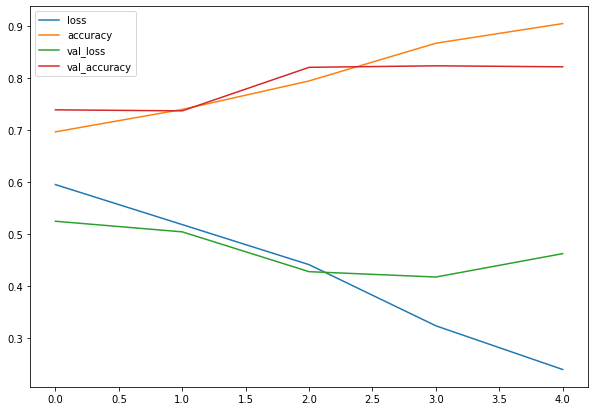

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7));

### Assessment: Model 1
We can see after 2 epochs validation accuracy platues, whereas training accuracy increases. It means after 2 epochs our model is remembering training set getting used to it.

### Impovement
To `augment` the training set images; to increase the dataset for learning and teaching the model warped features so it can learn better.

In [6]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=-20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             horizontal_flip=True) 


In [7]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary')


Found 4105 images belonging to 2 classes.


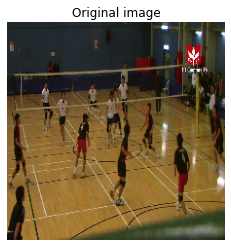

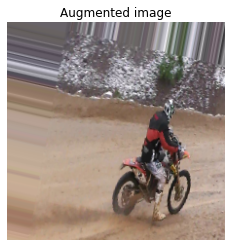

In [42]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
history_2 = model.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - 514s 4s/step - loss: 0.5870 - accuracy: 0.7116 - val_loss: 0.4618 - val_accuracy: 0.7507
Epoch 2/5
129/129 [==============================] - 499s 4s/step - loss: 0.5581 - accuracy: 0.7164 - val_loss: 0.4592 - val_accuracy: 0.8179
Epoch 3/5
129/129 [==============================] - 497s 4s/step - loss: 0.5418 - accuracy: 0.7267 - val_loss: 0.4119 - val_accuracy: 0.8247
Epoch 4/5
129/129 [==============================] - 494s 4s/step - loss: 0.5276 - accuracy: 0.7362 - val_loss: 0.4180 - val_accuracy: 0.8160
Epoch 5/5
129/129 [==============================] - 487s 4s/step - loss: 0.5330 - accuracy: 0.7347 - val_loss: 0.4817 - val_accuracy: 0.7936


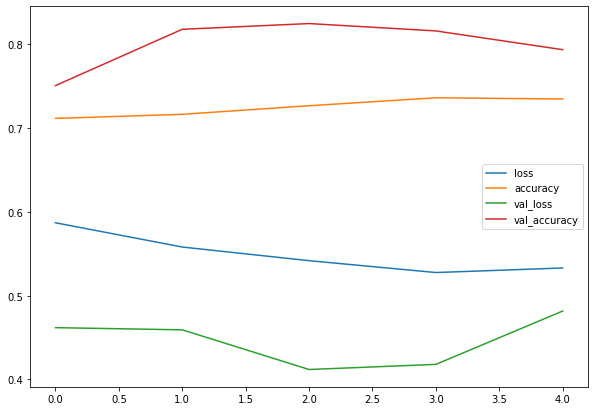

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

#### Hmmm
Our model performs better on validation set now than it does on training set, because of Image augmentation , we can try to increase the number of layers and/or neurons to increase the accuracy of training set as well and then train it on augmented set and see what happens

### Model-2
(With increased trainable parameters)

In [31]:
model_2 = tf.keras.models.Sequential([
  Conv2D(filters=20,
					kernel_size=6,
					activation="relu", 
					input_shape=(224, 224, 3)
	),
  Conv2D(20, 5, activation="relu"),
  Conv2D(10, 4, activation="relu"),
  MaxPool2D(pool_size=2, 
            padding="valid"), 
  Conv2D(10, 3, activation="relu"), 
  Conv2D(5, 3, activation="relu"),
  Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [32]:
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [41]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 219, 219, 20)      2180      
                                                                 
 conv2d_42 (Conv2D)          (None, 215, 215, 20)      10020     
                                                                 
 conv2d_43 (Conv2D)          (None, 212, 212, 10)      3210      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 106, 106, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 104, 104, 10)      910       
                                                                 
 conv2d_45 (Conv2D)          (None, 102, 102, 5)       455       
                                                      

### WOW!
Almost double the trainable parameters

In [34]:
# Fit the model on normal training set
history_3 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - 134s 947ms/step - loss: 0.6083 - accuracy: 0.6833 - val_loss: 0.5640 - val_accuracy: 0.7342
Epoch 2/5
129/129 [==============================] - 113s 881ms/step - loss: 0.5703 - accuracy: 0.7152 - val_loss: 0.5581 - val_accuracy: 0.7205
Epoch 3/5
129/129 [==============================] - 110s 853ms/step - loss: 0.4640 - accuracy: 0.7888 - val_loss: 0.4805 - val_accuracy: 0.7770
Epoch 4/5
129/129 [==============================] - 112s 867ms/step - loss: 0.3204 - accuracy: 0.8641 - val_loss: 0.4750 - val_accuracy: 0.7653
Epoch 5/5
129/129 [==============================] - 110s 852ms/step - loss: 0.1353 - accuracy: 0.9501 - val_loss: 0.6619 - val_accuracy: 0.7683


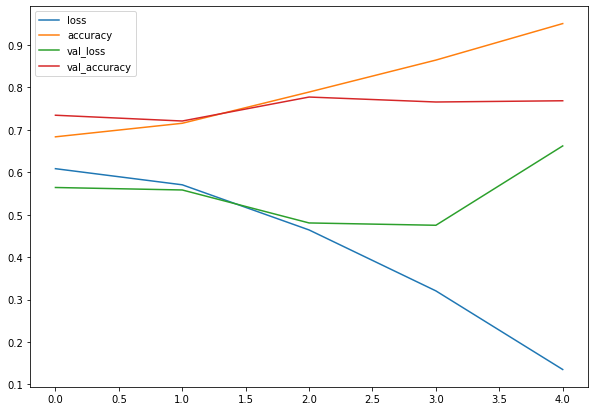

In [38]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7));

Seems to be showing similar pattern to model 1, lets try augmentated data

In [39]:
# Fit the model on augmented training set
history_4 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - 149s 1s/step - loss: 0.5905 - accuracy: 0.6943 - val_loss: 0.5323 - val_accuracy: 0.7585
Epoch 2/5
129/129 [==============================] - 151s 1s/step - loss: 0.5786 - accuracy: 0.6904 - val_loss: 0.5205 - val_accuracy: 0.7517
Epoch 3/5
129/129 [==============================] - 150s 1s/step - loss: 0.5739 - accuracy: 0.6994 - val_loss: 0.5295 - val_accuracy: 0.7361
Epoch 4/5
129/129 [==============================] - 151s 1s/step - loss: 0.5779 - accuracy: 0.7043 - val_loss: 0.5149 - val_accuracy: 0.7429
Epoch 5/5
129/129 [==============================] - 149s 1s/step - loss: 0.5663 - accuracy: 0.7096 - val_loss: 0.5130 - val_accuracy: 0.7439


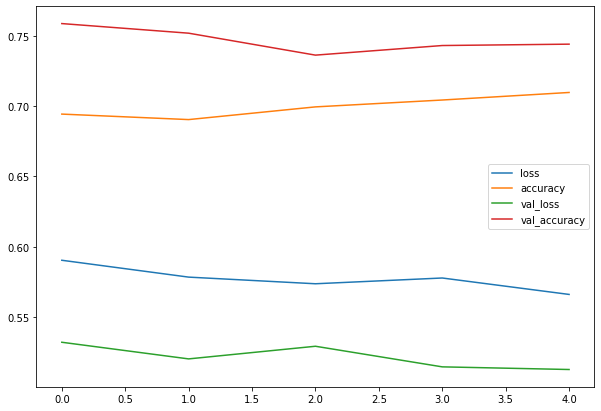

In [40]:
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

### Assessment-2
It seems that the CNN models are platueing at approx 80% accuracy, which is fine but can be better. One more thing to try is to double the number of epoch on the best model yet, i.e model_1 with normal training set

In [43]:
model = tf.keras.models.Sequential([
  Conv2D(filters=10,
					kernel_size=3,
					activation="relu", 
					input_shape=(224, 224, 3)
	),

  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, 
            padding="valid"), 
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [44]:
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [45]:
# Fit the model
history = model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
129/129 [==============================] - 113s 860ms/step - loss: 0.5769 - accuracy: 0.7077 - val_loss: 0.5444 - val_accuracy: 0.7244
Epoch 2/10
129/129 [==============================] - 108s 838ms/step - loss: 0.5042 - accuracy: 0.7532 - val_loss: 0.4457 - val_accuracy: 0.7984
Epoch 3/10
129/129 [==============================] - 126s 979ms/step - loss: 0.4212 - accuracy: 0.8085 - val_loss: 0.4249 - val_accuracy: 0.8150
Epoch 4/10
129/129 [==============================] - 108s 841ms/step - loss: 0.3038 - accuracy: 0.8736 - val_loss: 0.4796 - val_accuracy: 0.8053
Epoch 5/10
129/129 [==============================] - 107s 829ms/step - loss: 0.2351 - accuracy: 0.9060 - val_loss: 0.4187 - val_accuracy: 0.8277
Epoch 6/10
129/129 [==============================] - 108s 838ms/step - loss: 0.1709 - accuracy: 0.9345 - val_loss: 0.4922 - val_accuracy: 0.8179
Epoch 7/10
129/129 [==============================] - 127s 989ms/step - loss: 0.1298 - accuracy: 0.9552 - val_loss: 0.5394 -

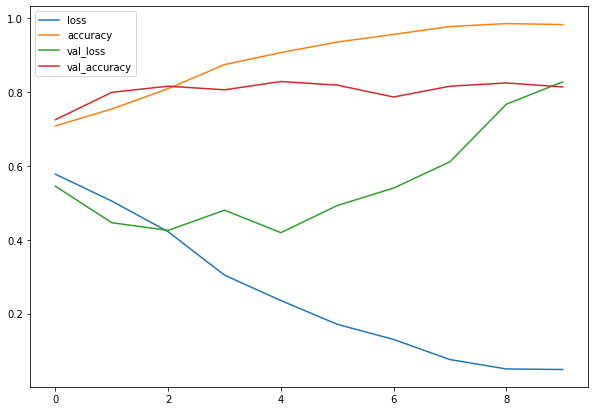

In [46]:
pd.DataFrame(history.history).plot(figsize=(10, 7));

### Assessment-3
Assessment 1,2 was indeed correct, our model is plaue-ing at around 80% which can go for alternative approach.

## Approach-2: Transfer Learning
#### Model used: EfficientNetB3-sports-0.97.h5
[Link to the model](https://www.kaggle.com/datasets/gpiosenka/sports-classification?select=EfficientNetB3-sports-0.97.h5)

In [12]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/EfficientNetB3-sports-0.97.h5.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [33]:
loaded_model = tf.keras.models.load_model("/tmp/EfficientNetB3-sports-0.97.h5")

In [25]:
loaded_model.save('effnet_b3_sports')

In [31]:
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer("effnet_b3_sports",
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(150, 150, 3))
  

In [32]:
model_3 = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation="sigmoid")      
  ])


In [36]:
# Set the seed
tf.random.set_seed(42)

# Setup the train and test directories
train_dir = "/tmp/data/train/"
test_dir = "/tmp/data/test/"

# Import data from directories and turn it into batches
train_data_150 = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(150, 150),
                                               class_mode="binary",
                                               seed=42)

valid_data_150 = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(150, 150),
                                               class_mode="binary",
                                               seed=42)

Found 4105 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [38]:
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [42]:
history_150 = model_3.fit(train_data_150,
                        epochs=5,
                        steps_per_epoch=len(train_data_150),
                        validation_data=valid_data_150,
                        validation_steps=len(valid_data_150))

Epoch 1/5
129/129 [==============================] - 158s 1s/step - loss: 0.6769 - accuracy: 0.6650 - val_loss: 0.6627 - val_accuracy: 0.6719
Epoch 2/5
129/129 [==============================] - 115s 894ms/step - loss: 0.6530 - accuracy: 0.6724 - val_loss: 0.6460 - val_accuracy: 0.6719
Epoch 3/5
129/129 [==============================] - 110s 858ms/step - loss: 0.6412 - accuracy: 0.6724 - val_loss: 0.6379 - val_accuracy: 0.6719
Epoch 4/5
129/129 [==============================] - 111s 860ms/step - loss: 0.6360 - accuracy: 0.6724 - val_loss: 0.6348 - val_accuracy: 0.6719
Epoch 5/5
129/129 [==============================] - 110s 853ms/step - loss: 0.6339 - accuracy: 0.6724 - val_loss: 0.6336 - val_accuracy: 0.6719


In [43]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 100)              11208851  
 erasLayer)                                                      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,208,952
Trainable params: 101
Non-trainable params: 11,208,851
_________________________________________________________________


In [45]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [46]:
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))
  

In [47]:
resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

In [48]:
resnet_model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [49]:
resnet_history = resnet_model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - 123s 905ms/step - loss: 0.3509 - accuracy: 0.8477 - val_loss: 0.3038 - val_accuracy: 0.8715
Epoch 2/5
129/129 [==============================] - 133s 1s/step - loss: 0.2522 - accuracy: 0.8974 - val_loss: 0.2665 - val_accuracy: 0.8978
Epoch 3/5
129/129 [==============================] - 113s 876ms/step - loss: 0.2113 - accuracy: 0.9191 - val_loss: 0.2403 - val_accuracy: 0.9046
Epoch 4/5
129/129 [==============================] - 113s 878ms/step - loss: 0.1862 - accuracy: 0.9362 - val_loss: 0.2270 - val_accuracy: 0.9163
Epoch 5/5
129/129 [==============================] - 112s 868ms/step - loss: 0.1695 - accuracy: 0.9430 - val_loss: 0.2243 - val_accuracy: 0.9172


In [63]:
resnetv2_152_url = "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5"

In [64]:
feature_extractor_layer = hub.KerasLayer(resnetv2_152_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))
  

In [65]:
resnetv2_152_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

In [66]:
resnetv2_152_model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
resnetv2_152_history = resnet_model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9464

In [50]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [51]:
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [52]:
effnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

In [53]:
effnet_model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [54]:
effnet_history = effnet_model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - 129s 927ms/step - loss: 0.3631 - accuracy: 0.8426 - val_loss: 0.2624 - val_accuracy: 0.9085
Epoch 2/5
129/129 [==============================] - 113s 878ms/step - loss: 0.2322 - accuracy: 0.9118 - val_loss: 0.2297 - val_accuracy: 0.9202
Epoch 3/5
129/129 [==============================] - 120s 936ms/step - loss: 0.1999 - accuracy: 0.9259 - val_loss: 0.2126 - val_accuracy: 0.9221
Epoch 4/5
129/129 [==============================] - 113s 876ms/step - loss: 0.1798 - accuracy: 0.9367 - val_loss: 0.2029 - val_accuracy: 0.9250
Epoch 5/5
129/129 [==============================] - 132s 1s/step - loss: 0.1658 - accuracy: 0.9432 - val_loss: 0.1941 - val_accuracy: 0.9279


In [58]:
effnetv2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2"

In [59]:
feature_extractor_layer = hub.KerasLayer(effnetv2_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [60]:
effnetv2_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

In [61]:
effnetv2_model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [62]:
effnetv2_history = effnet_model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
129/129 [==============================] - 118s 918ms/step - loss: 0.1539 - accuracy: 0.9469 - val_loss: 0.1884 - val_accuracy: 0.9299
Epoch 2/5
129/129 [==============================] - 117s 908ms/step - loss: 0.1448 - accuracy: 0.9525 - val_loss: 0.1831 - val_accuracy: 0.9338
Epoch 3/5
129/129 [==============================] - 132s 1s/step - loss: 0.1368 - accuracy: 0.9542 - val_loss: 0.1813 - val_accuracy: 0.9328
Epoch 4/5
129/129 [==============================] - 116s 900ms/step - loss: 0.1295 - accuracy: 0.9583 - val_loss: 0.1770 - val_accuracy: 0.9377
Epoch 5/5
129/129 [==============================] - 114s 881ms/step - loss: 0.1244 - accuracy: 0.9603 - val_loss: 0.1753 - val_accuracy: 0.9377
